# **CS 1810 Homework 0**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever u use to run ur code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary (especially for hw0) but can help prevent any issues due to package versions.

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


## 2.1 Plot $y = -3x^2 + 72x + 70$.

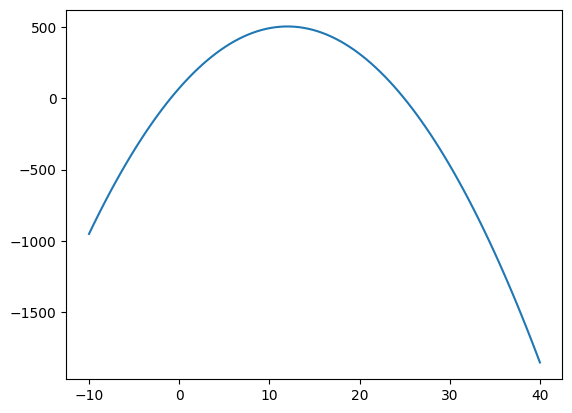

In [4]:
x = np.linspace(-10, 40, 100)
y = -3 * x ** 2 + 72 * x + 70

plt.plot(x, y)

## 2.3 Plot $f(x_1, x_2)$.

<function matplotlib.pyplot.show(close=None, block=None)>

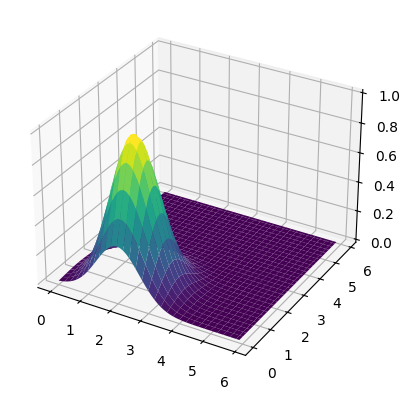

In [5]:
x1 = np.arange(0,6,0.1)
x2 = np.arange(0,6,0.1)
X1, X2 = np.meshgrid(x1, x2)

y = np.exp(-(X1-2)**2 - (X2-1)**2)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.plot_surface(X1, X2, y, cmap='viridis')

plt.show


## 3.1(b) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

<Axes: >

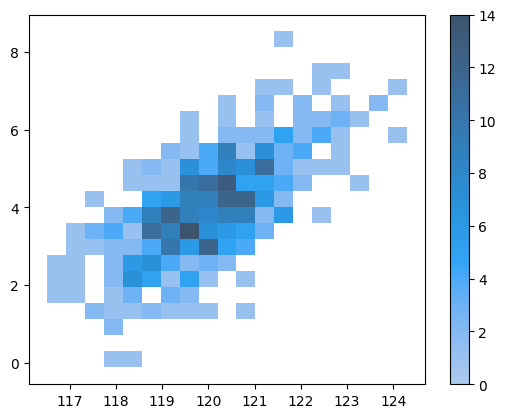

In [29]:
mean = [120, 4]
cov = [[1.5, 1], [1, 1.5]]

rv = mvn(mean, cov)
draws = rv.rvs(size=500)

sns.histplot(x=draws[:,0], y=draws[:,1], cbar=True)

## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

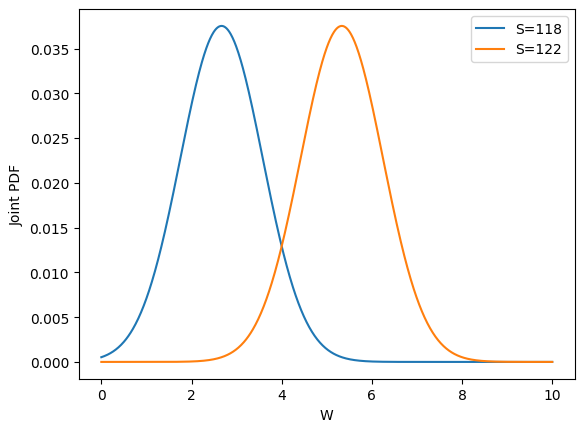

In [35]:
w = np.linspace(0, 10, 1001)

mean = [120, 4]
cov = [[1.5, 1], [1, 1.5]]

rv = mvn(mean, cov)

# fixed at S=118

fixed_s = np.full(1001, 118)
res = np.column_stack((fixed_s, w))

s_118 = rv.pdf(res)

fixed_s = np.full(1001, 122)
res = np.column_stack((fixed_s, w))

s_122 = rv.pdf(res)

plt.xlabel('W')
plt.ylabel('Joint PDF')
plt.plot(w, s_118, label='S=118')
plt.plot(w, s_122, label='S=122')
plt.legend()

## 3.5(a) Function to simulate draws from $T^{*}$.

In [79]:
import scipy.stats


def drawT():
    noise = np.random.normal(0, 5)

    mean = [120, 4]
    cov = [[1.5, 1], [1, 1.5]]

    rv = mvn(mean, cov)

    draw = rv.rvs()
    size = draw[0]
    weight = draw[1]

    return 60 + 0.6 * weight + 0.2 * size + noise


def drawT_star():
    # Sum of i.i.d. Poissons is Poisson so N ~ Pois(72)
    N = scipy.stats.poisson.rvs(72)
    if N < 0:
        return 0
    
    res = 0

    for i in range(N):
        res += (drawT().item())
    
    return res


print(drawT_star())

6798.364992957787


## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [82]:
res = []
for i in range(1000):
    res.append(drawT_star())

mean = np.mean(res)
std = np.std(res)

print("Mean: ", mean , " Std: ", std)

Mean:  6249.467749359714  Std:  731.6720594291828


# 4.1: Examining the Data

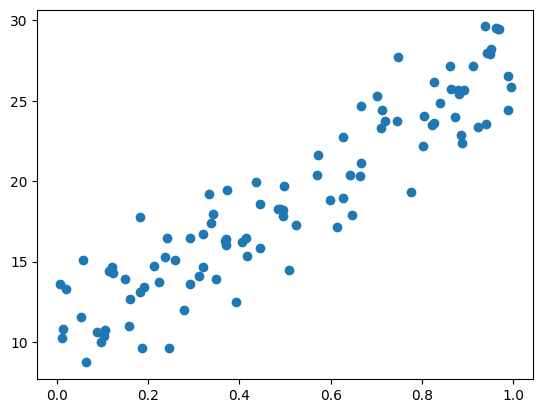

In [180]:
# Steve's solution
data = pd.read_csv("data/points.csv").values

# Steve was extracting rows and not columns
x = data[:,0]
y = data[:,1]

plt.scatter(x, y)



## 4.2: Adding the Intercept/Bias Term

In [181]:
# Steve's solution
intercept = np.ones(x.shape[0])
X = np.hstack([intercept.reshape(-1, 1), x.reshape(-1, 1)]) # horizontally stack the ones and x coordinates next to each other

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (100, 2)
y shape:  (100,)


## 4.4: Implementing the LinearRegression Class

In [206]:
# Steve's solution
class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        """
        Fit linear model to the data, estimating weights w.
        """
        # ** -1 does not properly invert a matrix, also we need @ instead of * for matrix multiplication
        # Also, we do not transpose y but instead X. Instead of returning, we modify self.w to the proper weight.
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y

    # Needs self in parameters to access self.w
    def predict(self, X):
        """
        Use fitted weights to predict target y given input features X.
        """
        return X @ self.w

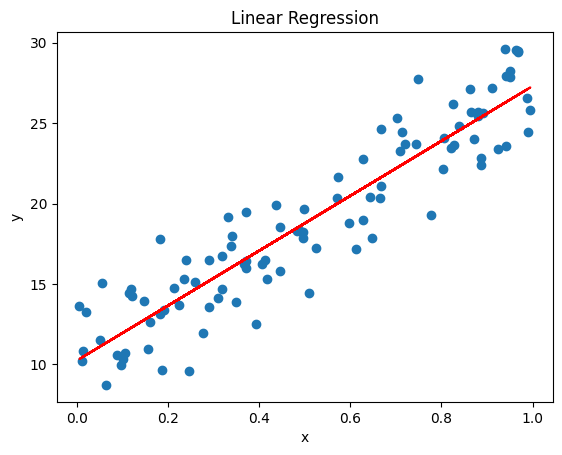

In [207]:
### DON'T MODIFY THIS CELL

# Fit the linear regression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
# Plot the data and the regression line
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred, color='red')
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('img_output/hw0_p4_4.png')
plt.show()

## 4.5 MSE Computation

In [210]:
# Steve's solution
mse = 0
for i in range(len(y)):
    mse = mse + (y[i] - y_pred[i])**2
mse = mse / len(y)
print(mse)

4.439331220193986


In [212]:
# In Numpy
mse = np.mean((y - y_pred)**2)
print(mse)

4.439331220193985
